# Visualizing The Gender Gap In College Degrees
## Introduction
In this project, we'll generate line charts to visualize the gender gap across all college degree categories granted to women from 1970 to 2012, and export the final diagram we create as an image file.

The dataset we are going to use was compiled by Randal Olson, a data scientist at University of Pennsylvania, based on an annual dataset released by The Department of Education Statistics that contains the percentage of bachelor's degrees granted to women from 1970 to 2012. The dataset is broken up into 17 categories of degrees, with each column as a separate category, and can be found [here](http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/).
## Data Visualization
### Comparing STEM Categories Men vs. Women
For our first visualzation, we'll do now the following steps:
- downloading the necessary libraries;
- reading the dataset into pandas;
- creating line charts of STEM (science, technology, engineering, and mathematics) degree categories awarded to men and women from 1972 to 2012;
- customizing the charts to be color-blindness-friendly and more readable;
- ordering the charts by decreasing ending gender gap;
- removing spines and ticks to improve the data-ink ratio;
- setting the same limits to all the charts;
- adding text annotations to the rightmost and leftmost charts, instead of a legend (to avoid overlapping with the charts).

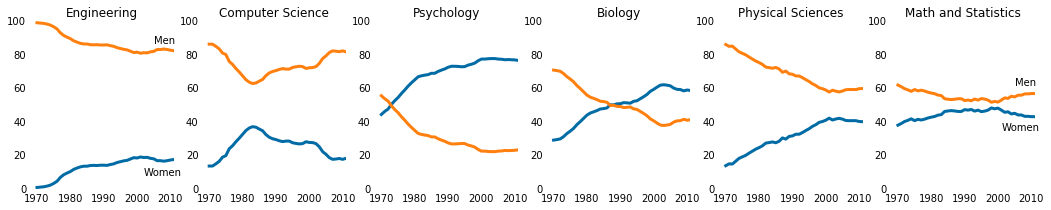

In [1]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset into pandas
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

# Defining color-blindness-friendly colors from the Color Blind 10 palette
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# Creating a list of the STEM categories ordered by decreasing ending gender gap
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

# Creating a layout of a single row with 6 columns
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    
    # Creating line charts of STEM categories for men and women from 1972 to 2012
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Removing chartjunk and setting the same limits to all charts
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Adding text annotations to the rightmost and leftmost charts
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
plt.show()

From this figure, the following observations can be made.

- The biggest gender gap is observed for the Engineering category, with  the percentage of men strongly dominating. It tends to decrease in the last 40 years of given period, but still remains considerable.
- For Computer Science - the same big gap with men dominating. At around 1985 the gap started rapidly decreasing, which was soon followed by a comparably rapid increase.
- For Psychology category initially the percentages of men and women were almost equal. Soon the percentage of women started rapidly growing, reaching a gap of almost 60% in 2012.
- The Biology category is characterized by changing the sign of the gender gap: initially men were dominating, then at around 1990 the situation changed, and by 2012 we observe the domination of women in this sphere.
- For Physical Sciences the gender gap decreased a lot in the last 40 years, reaching 20% by 2012, with men dominating.
- The smallest gender gap we see for Math and Statistics category, with men slightly dominating.

### Comparing All Categores
For comparing across all the 17 categories, we can group them into STEM, liberal arts, and other, ordering each list in descending order by the % of degrees awarded to women. 

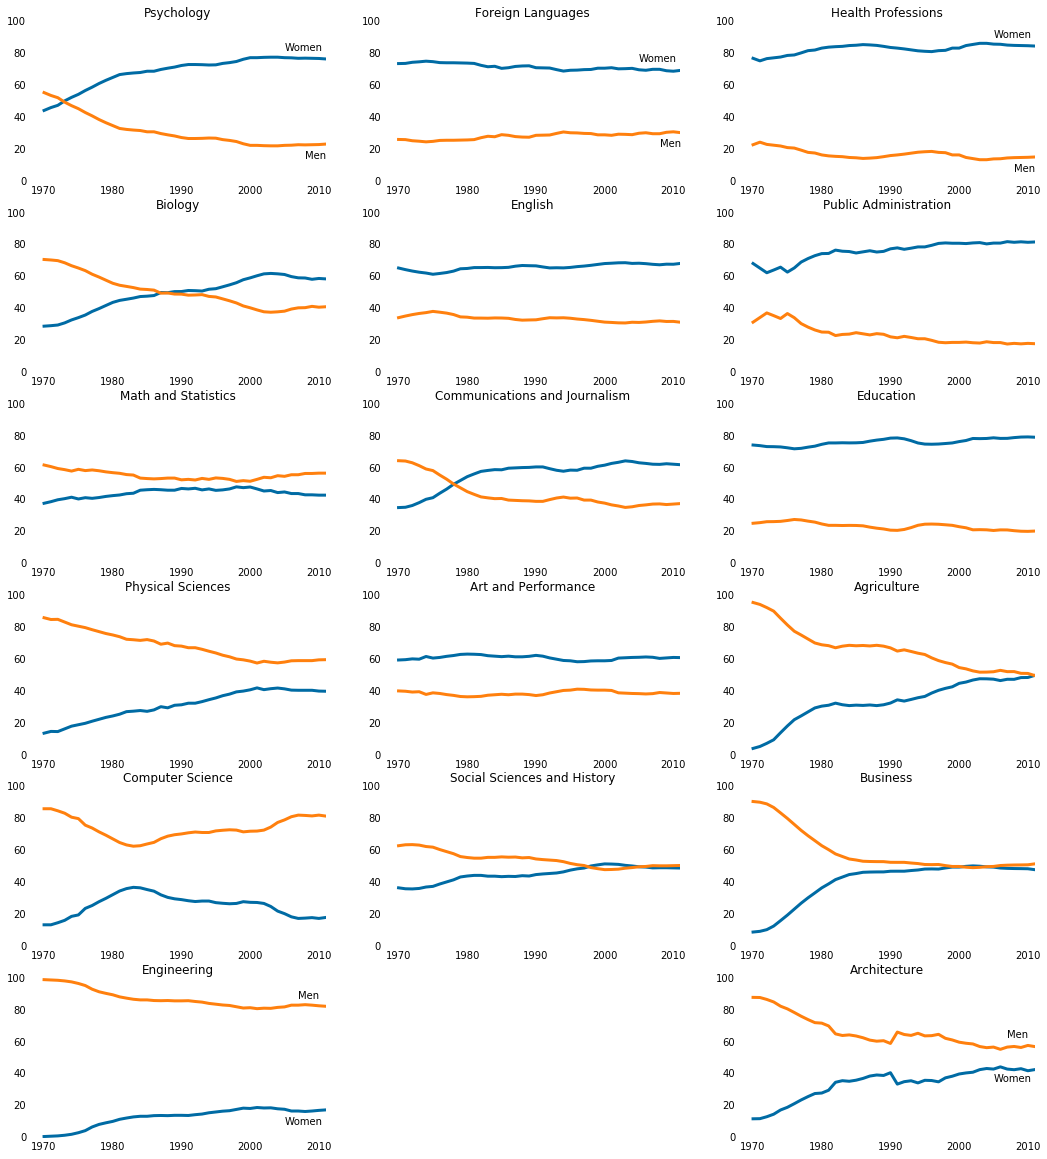

In [2]:
# Creating lists for groups of the college categories ordered by decreasing the % of degrees awarded to women
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(18, 20))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
                
    # Creating line charts of STEM categories for men and women from 1972 to 2012
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Removing chartjunk and setting the same limits to all charts
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Adding text annotations to the rightmost and leftmost charts
    if sp == 0:
        ax.text(2008, 14, 'Men')
        ax.text(2005, 82, 'Women')
    elif sp == 5:
        ax.text(2007, 87, 'Men')
        ax.text(2005, 8, 'Women')

# Adding subplots in the 2nd column of the 6*3 grid      
for sp in range(0,5):
    ax = fig.add_subplot(6,3, sp*3+2)
       
    # Creating line charts of arts categories for men and women from 1972 to 2012
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Removing chartjunk and setting the same limits to all charts
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Adding text annotations to the rightmost chart
    if sp == 0:
        ax.text(2008, 22, 'Men')
        ax.text(2005, 75, 'Women')

# Adding subplots in the 3rd column of the 6*3 grid     
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # Creating line charts of other categories for men and women from 1972 to 2012
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Removing chartjunk and setting the same limits to all charts
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Adding text annotations to the rightmost and leftmost charts
    if sp == 0:
        ax.text(2008, 6, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 5:
        ax.text(2007, 63, 'Men')
        ax.text(2005, 35, 'Women')
        
plt.show()

### Making Plots More Readable
#### Removing the x-axis labels
The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. Let's remove the x-axis labels for every line chart in a column except for the bottommost one.

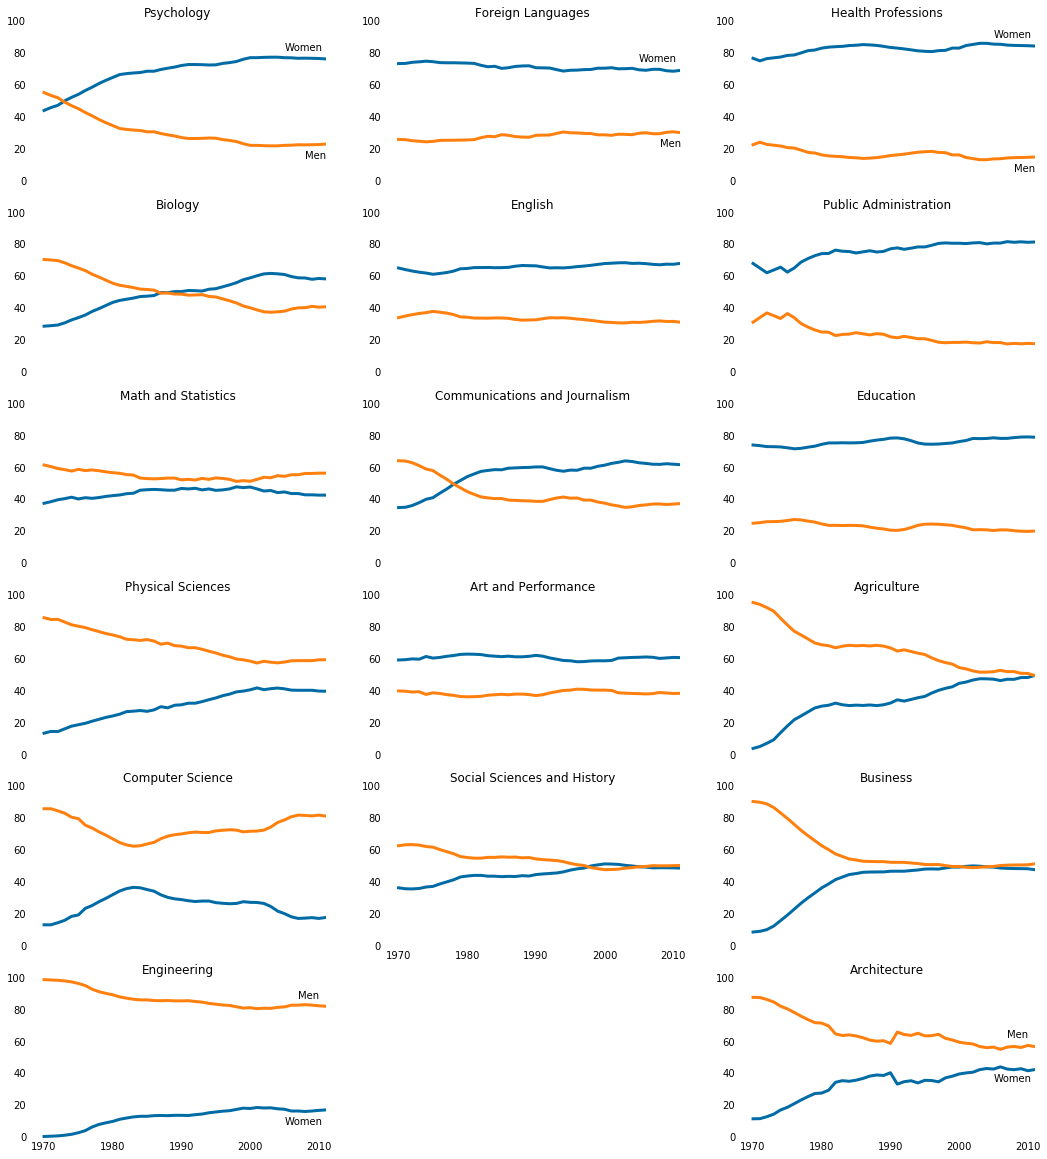

In [3]:
fig = plt.figure(figsize=(18, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    # Removing ticks and the x-axis labels
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 14, 'Men')
        ax.text(2005, 82, 'Women')
    elif sp == 5:
        ax.text(2007, 87, 'Men')
        ax.text(2005, 8, 'Women')
        # Enable the x-axis labels for the bottommost line chart
        ax.tick_params(labelbottom='on')

for sp in range(0,5):
    ax = fig.add_subplot(6,3, sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    # Removing ticks and the x-axis labels
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 22, 'Men')
        ax.text(2005, 75, 'Women')
    # Enable the x-axis labels for the bottommost line chart
    if sp == 4:  
        ax.tick_params(labelbottom='on')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    # Removing ticks and the x-axis labels
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 6, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 5:
        ax.text(2007, 63, 'Men')
        ax.text(2005, 35, 'Women')
        # Enable the x-axis labels for the bottommost line chart
        ax.tick_params(labelbottom='on')
        
plt.show()

In this  way the plots look cleaner and more readable. It's now more difficult to discern approximately which years some interesting changes in trends may have happened, but we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.
#### Simplifying the y-axis labels
Let's also simplify the y-axis labels. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

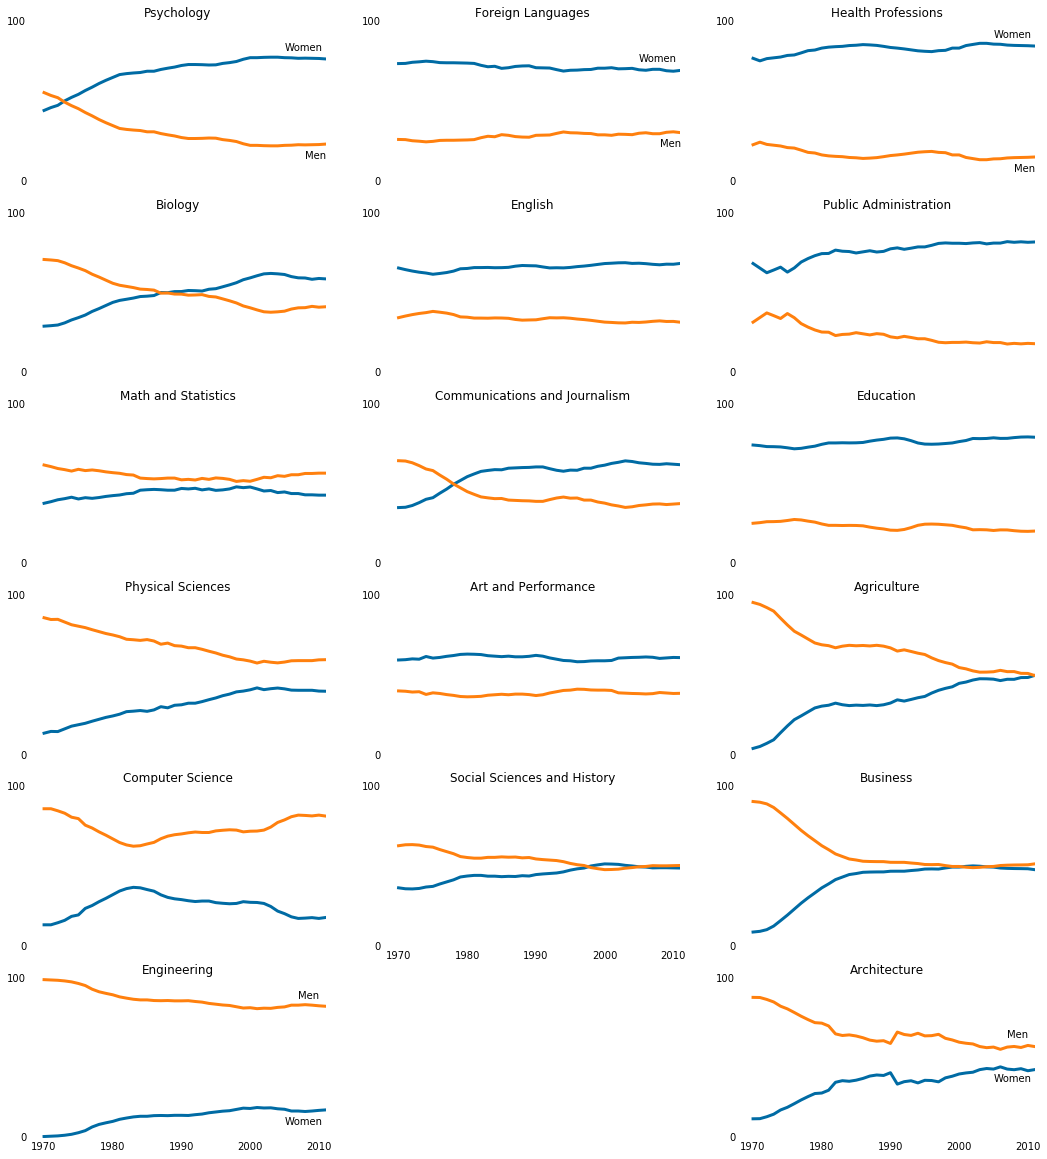

In [4]:
fig = plt.figure(figsize=(18, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # Displaying only the starting and ending labels on the y-axis
    ax.set_yticks([0,100])
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 14, 'Men')
        ax.text(2005, 82, 'Women')
    elif sp == 5:
        ax.text(2007, 87, 'Men')
        ax.text(2005, 8, 'Women')
        ax.tick_params(labelbottom='on')

for sp in range(0,5):
    ax = fig.add_subplot(6,3, sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # Displaying only the starting and ending labels on the y-axis
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 22, 'Men')
        ax.text(2005, 75, 'Women')
    if sp == 4:  
        ax.tick_params(labelbottom='on')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # Displaying only the starting and ending labels on the y-axis
    ax.set_yticks([0,100])
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2008, 6, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 5:
        ax.text(2007, 63, 'Men')
        ax.text(2005, 35, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

#### Adding a horizontal line
While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. To resolve it, let's use a horizontal line across all of the line charts where the y-axis label 50 would have been.

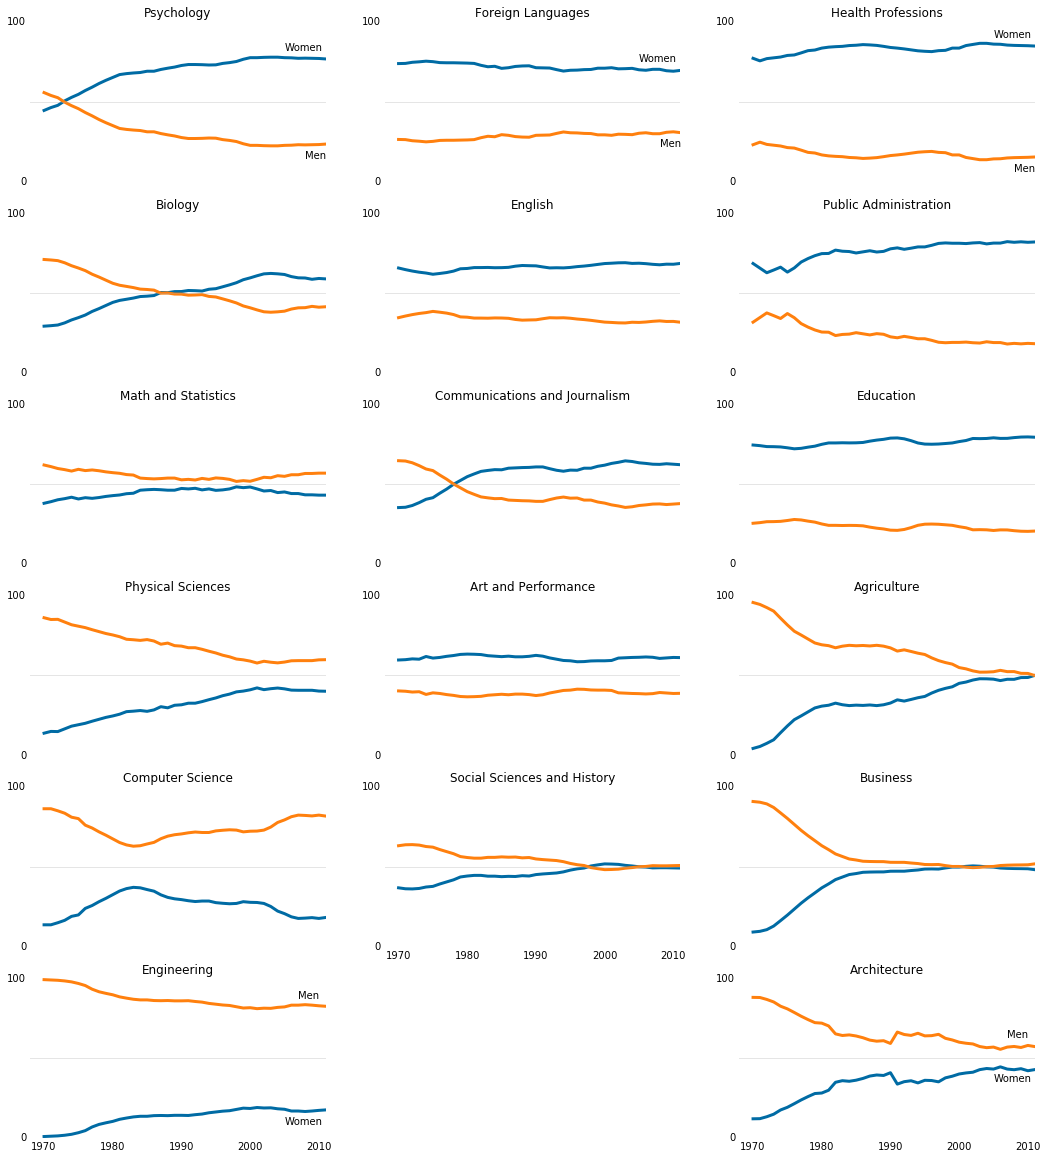

In [5]:
fig = plt.figure(figsize=(18, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    # Generating a horizontal line across the charts for the value 50 of the y-axis
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 14, 'Men')
        ax.text(2005, 82, 'Women')
    elif sp == 5:
        ax.text(2007, 87, 'Men')
        ax.text(2005, 8, 'Women')
        ax.tick_params(labelbottom='on')

for sp in range(0,5):
    ax = fig.add_subplot(6,3, sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    # Generating a horizontal line across the charts for the value 50 of the y-axis
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 22, 'Men')
        ax.text(2005, 75, 'Women')
    if sp == 4:  
        ax.tick_params(labelbottom='on')
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    # Generating a horizontal line across the charts for the value 50 of the y-axis
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 6, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 5:
        ax.text(2007, 63, 'Men')
        ax.text(2005, 35, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

## Exporting the Figure
Finally, we'll export all of the plots contained in the last figure as a single image PNG file.

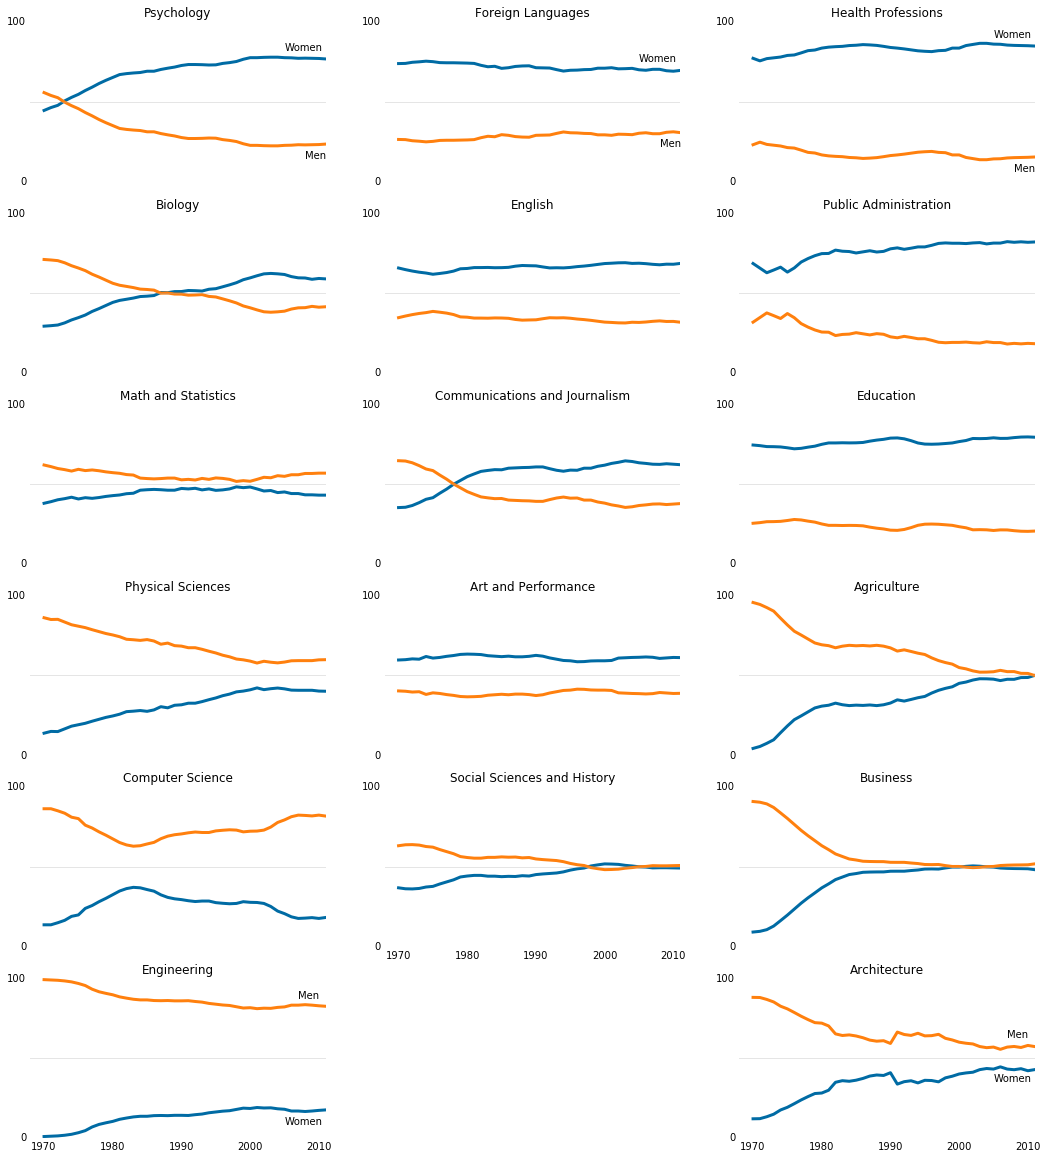

In [6]:
fig = plt.figure(figsize=(18, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 14, 'Men')
        ax.text(2005, 82, 'Women')
    elif sp == 5:
        ax.text(2007, 87, 'Men')
        ax.text(2005, 8, 'Women')
        ax.tick_params(labelbottom='on')

for sp in range(0,5):
    ax = fig.add_subplot(6,3, sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 22, 'Men')
        ax.text(2005, 75, 'Women')
    if sp == 4:  
        ax.tick_params(labelbottom='on')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2008, 6, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 5:
        ax.text(2007, 63, 'Men')
        ax.text(2005, 35, 'Women')
        ax.tick_params(labelbottom='on')
# Exporting to a file
plt.savefig('gender_degrees.png')        
plt.show()

## Conclusion
In this project we created the line charts to visualize the gender gap across 17 college degree categories from 1970 to 2012, made some step-by-step cosmetics to increase data-ink ratio and make the plots more readable, and exported the final diagram as a PNG file. Now, having a clear picture, we can make some observations about all the degree categories, in addition to those we made at the beginning of the project about only the STEM categories.

- For Health Professions, Education, Foreign Languages, English, Art & Performance we see almost a stable gender gap for the whole period in consideration, with women dominating.
- Computer Science and Engineering categories are strongly dominated by men.
- Biology, Psychology and Communications & Journalism categories are characterized by changing sign of the gender gap: from men to women dominating.
- Public Administration was always dominated by women, and at some point this gap increased even more.
- For Math & Statistics there is a rather small gender gap, with a slight domination of men.
- For Physical Sciences and Architecture there is a clear trend of decreasing the gender gap, while initially these categories were dominated by men.
- For Social Sciences & History, Agriculture and Business, being originally dominated by men, we observe a perfect collapse of the gender gap.